## Importing the libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer
from transformers import TFAutoModelForSequenceClassification
import tensorflow as tf
import os

2024-05-05 04:44:10.153724: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-05 04:44:10.153820: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-05 04:44:10.297758: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Reading the data

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/emotions/text.csv


In [3]:
df = pd.read_csv('/kaggle/input/emotions/text.csv')
df.head(2)

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0


In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.shape

(416809, 2)

In [24]:
sample_df = df.groupby('label', group_keys=False).apply(lambda x: x.sample(5000))
sample_df.shape

/tmp/ipykernel_34/918546535.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_df = df.groupby('label', group_keys=False).apply(lambda x: x.sample(5000))


(30000, 2)

In [25]:
X = sample_df['text'].to_list()
y = sample_df['label'].to_list()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

In [28]:
sample_df['label'].value_counts()

label
0    5000
1    5000
2    5000
3    5000
4    5000
5    5000
Name: count, dtype: int64

In [29]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
train_encodings = tokenizer(X_train, padding=True,return_tensors="np")
test_encodings = tokenizer(X_test, padding=True,return_tensors="np")

In [8]:
model = TFAutoModelForSequenceClassification.from_pretrained(MODEL, num_labels=6)

tf_model.h5:   0%|          | 0.00/499M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

Some layers of TFRobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [31]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), metrics=['accuracy'])
tf.config.run_functions_eagerly(True)

In [32]:
model.fit(train_encodings, np.array(y_train), validation_data=(test_encodings, np.array(y_test)))

750/750 [==============================] - 805s 1s/step - loss: 0.2672 - accuracy: 0.9139 - val_loss: 0.1610 - val_accuracy: 0.9477


In [33]:
model.evaluate(test_encodings, np.array(y_test))

/opt/conda/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


188/188 [==============================] - 40s 212ms/step - loss: 0.1610 - accuracy: 0.9477


[0.16095727682113647, 0.9476666450500488]

In [34]:
predictions = model.predict(dict(test_encodings))

188/188 [==============================] - 36s 193ms/step


In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [36]:
pred = tf.nn.softmax(predictions.logits).numpy()
y_pred = pred.argmax(axis=1)

In [37]:
accuracy_score(y_test, y_pred)

0.9476666666666667

<Axes: >

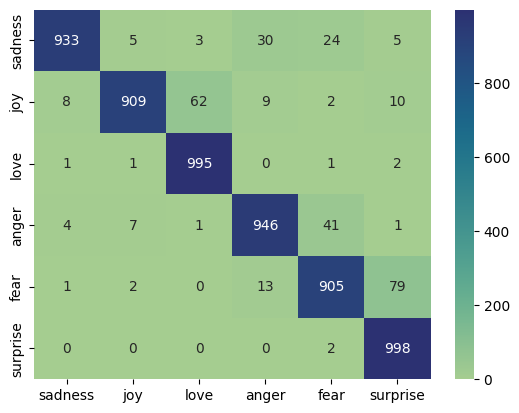

In [38]:
labels = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels=labels, yticklabels=labels, fmt='d', cmap='crest')

In [40]:
model.save('sentimment')

In [43]:
!zip -r sentimentProject.zip /kaggle/working/sentimment

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  adding: kaggle/working/sentimment/ (stored 0%)
  adding: kaggle/working/sentimment/saved_model.pb (deflated 93%)
  adding: kaggle/working/sentimment/keras_metadata.pb (deflated 95%)
  adding: kaggle/working/sentimment/fingerprint.pb (stored 0%)
  adding: kaggle/working/sentimment/variables/ (stored 0%)
  adding: kaggle/working/sentimment/variables/variables.data-00000-of-00001 (deflated 21%)
  adding: kaggle/working/sentimment/variables/variables.index (deflated 79%)
  adding: kaggle/working/sentimment/assets/ (stored 0%)
